## Configuración

## Configurar claves de API

Para hacer fine tuning en YOLO11, es necesario proporcionar tu clave de API de Roboflow. Seguí los siguientes pasos:

Accedé a la página de [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Hacé clic en `Copy`. Esto copiará tu clave privada al portapapeles.

En Colab, dirigite al panel izquierdo y hacé clic en `Secrets` (🔑). Guardá la clave de API de Roboflow bajo el nombre `ROBOFLOW_API_KEY`.

### Antes de comenzar

Verifiquemos que tenemos acceso a una GPU. Podemos usar el comando `nvidia-smi` para comprobarlo. En caso de cualquier inconveniente, dirigite a `Edit` → `Notebook settings` → `Hardware accelerator`, seleccioná `GPU` y luego hacé clic en `Save`.

In [ ]:
!nvidia-smi

Tue Nov  4 14:53:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTA:** Para facilitar la gestión de los conjuntos de datos, imágenes y modelos, se crea una constante `HOME`.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Instalar YOLO11 via Ultralytics

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.9/112.6 GB disk)


## Fine-tune YOLO11 en un conjunto de datos personalizado

**NOTA:** Al entrenar YOLOv11, asegurate de que tus datos estén ubicados en `datasets`. Si querés cambiar la ubicación predeterminada de los datos que usarás para el fine-tuning, podés hacerlo mediante el archivo `settings.json` de Ultralytics. En este tutorial se utiliza uno de los [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww)
 disponibles en [Roboflow Universe](https://universe.roboflow.com/). Al descargarlo, seleccioná el formato de exportación `yolov11`.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("aaaa-fufgb").project("anom-vs-no-anom-y6bns")
version = project.version(1)
dataset = version.download("yolov11")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


## Entrenamiento Personalizado

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=45 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.225 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/anom-vs-no-anom-1/data.yaml, epochs=45, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=

**NOTA:** Los resultados del entrenamiento completado se guardan en `{HOME}/runs/detect/train/`. Procedamos a examinarlos.

In [ ]:
!ls {HOME}/runs/detect/train3/

args.yaml					    train_batch19180.jpg
confusion_matrix_normalized.png			    train_batch19181.jpg
confusion_matrix.png				    train_batch19182.jpg
events.out.tfevents.1762255305.19731181a13b.5758.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


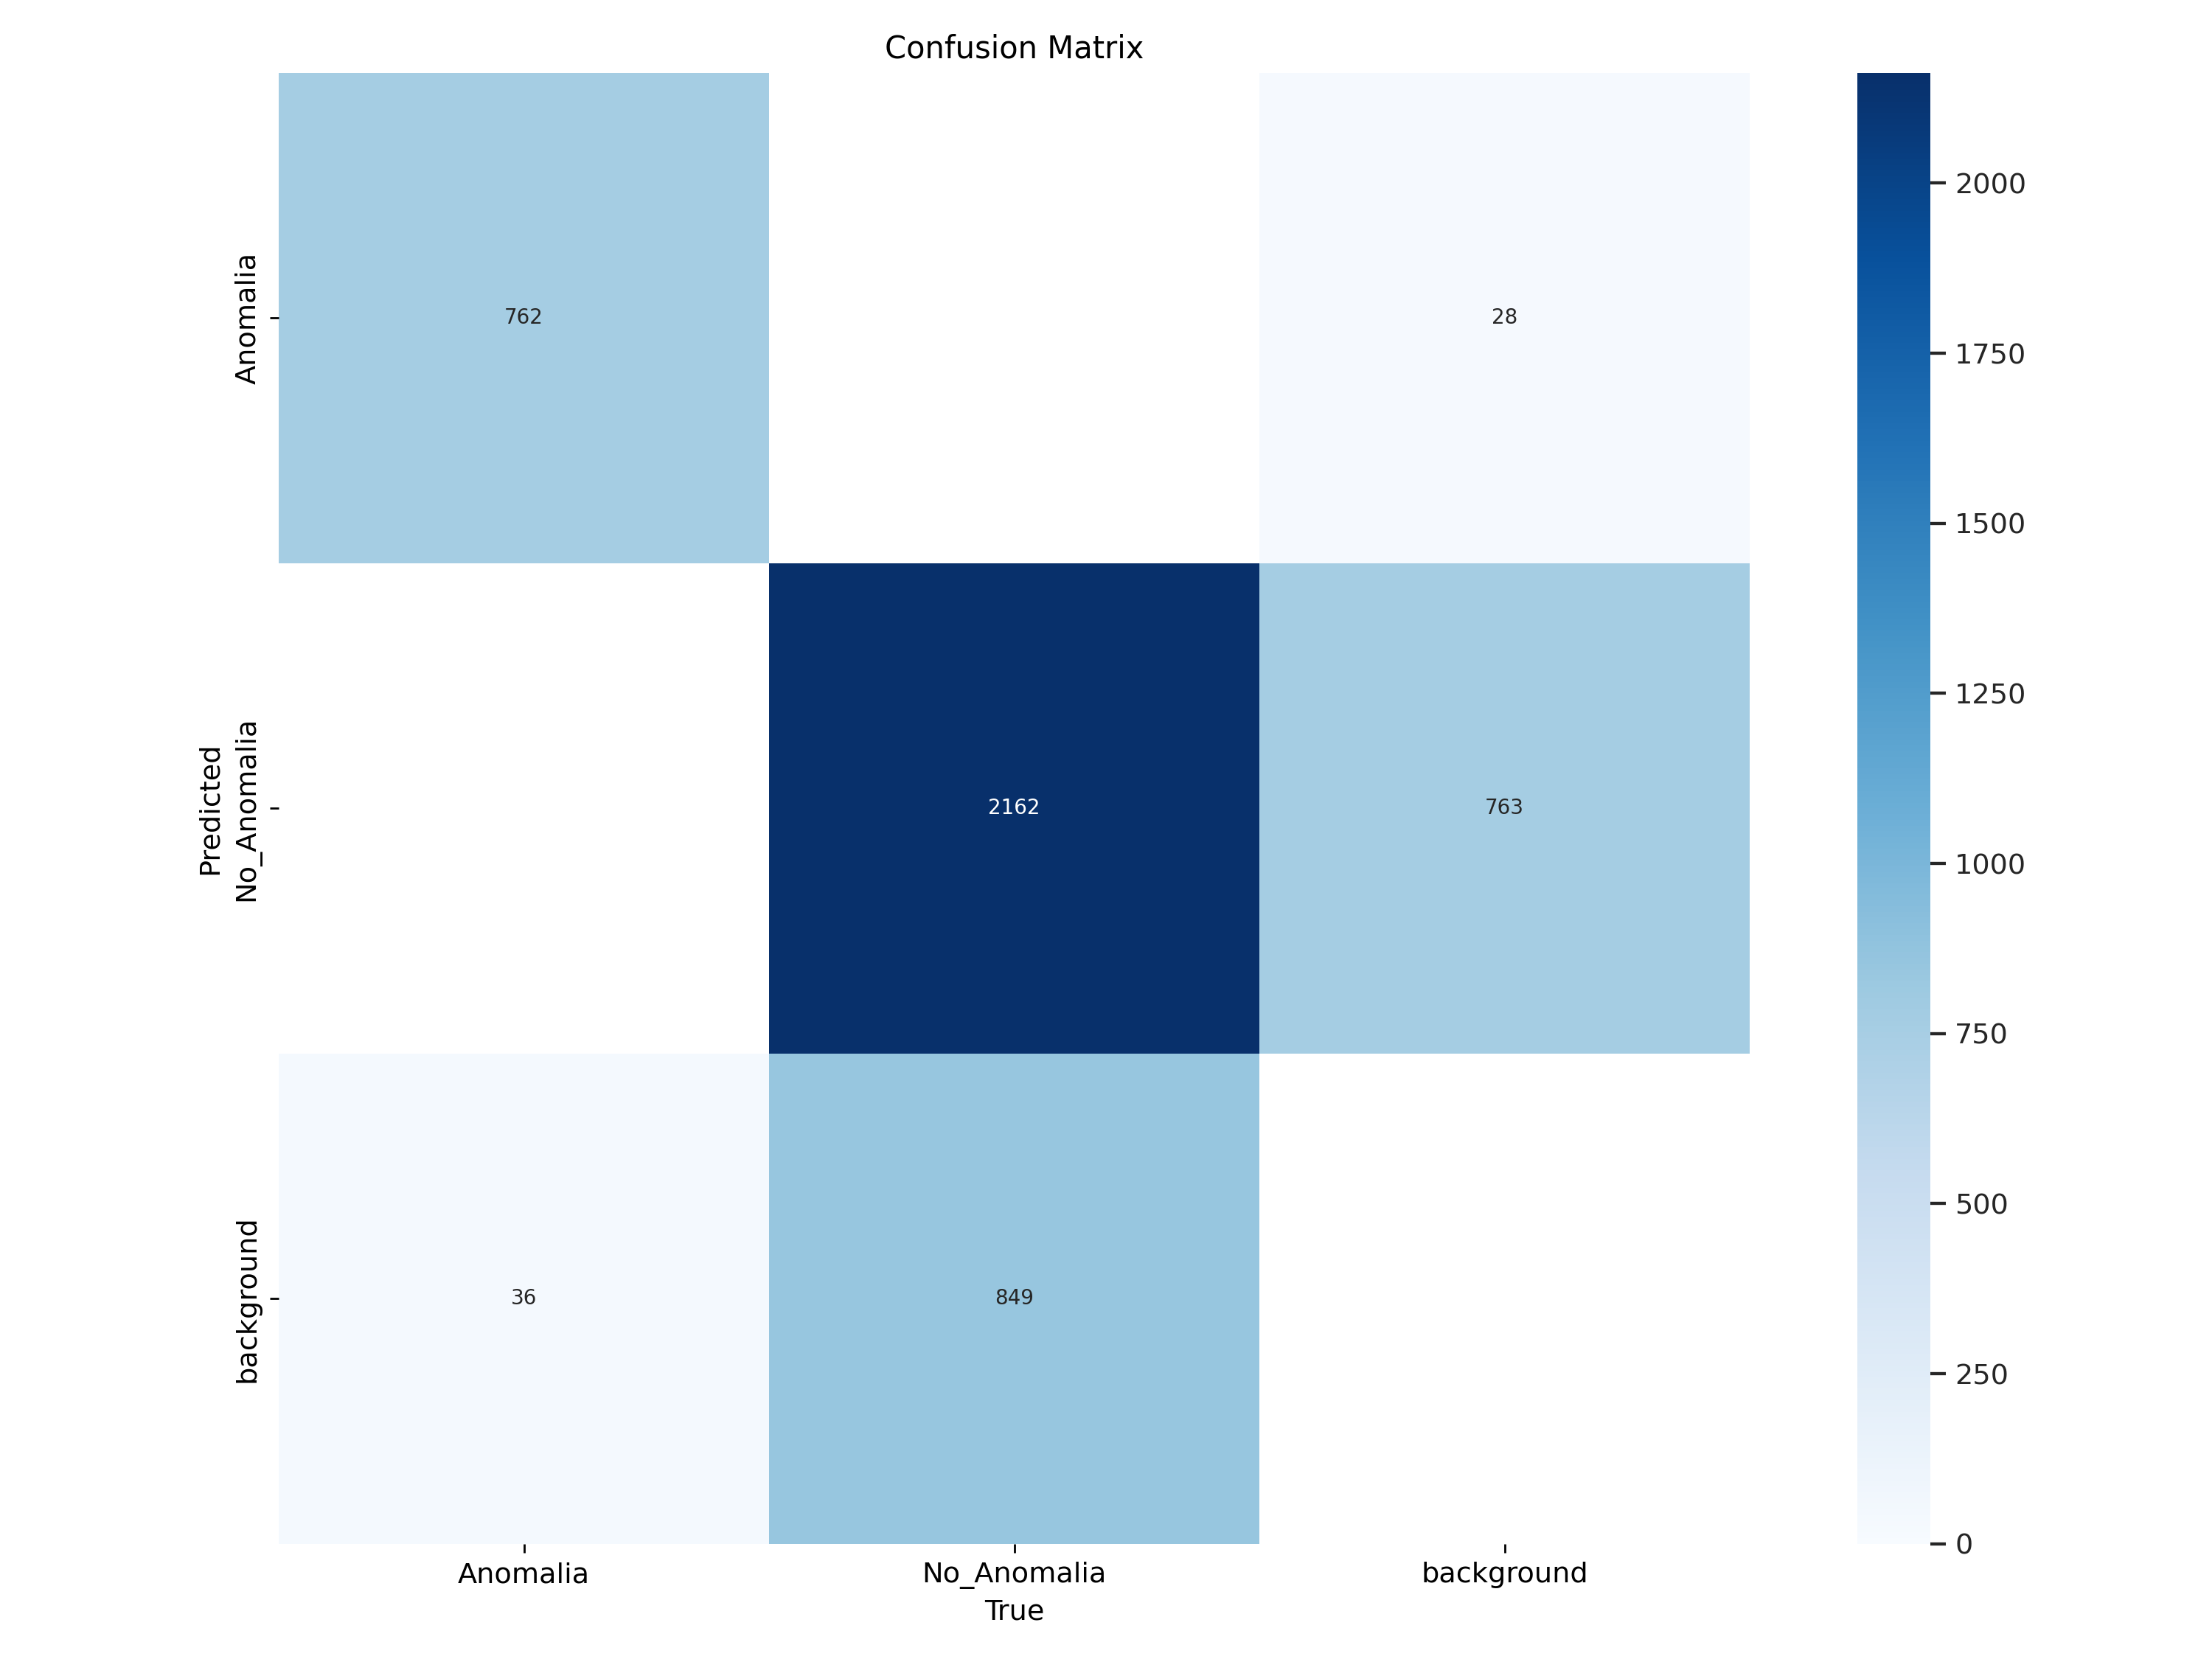

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

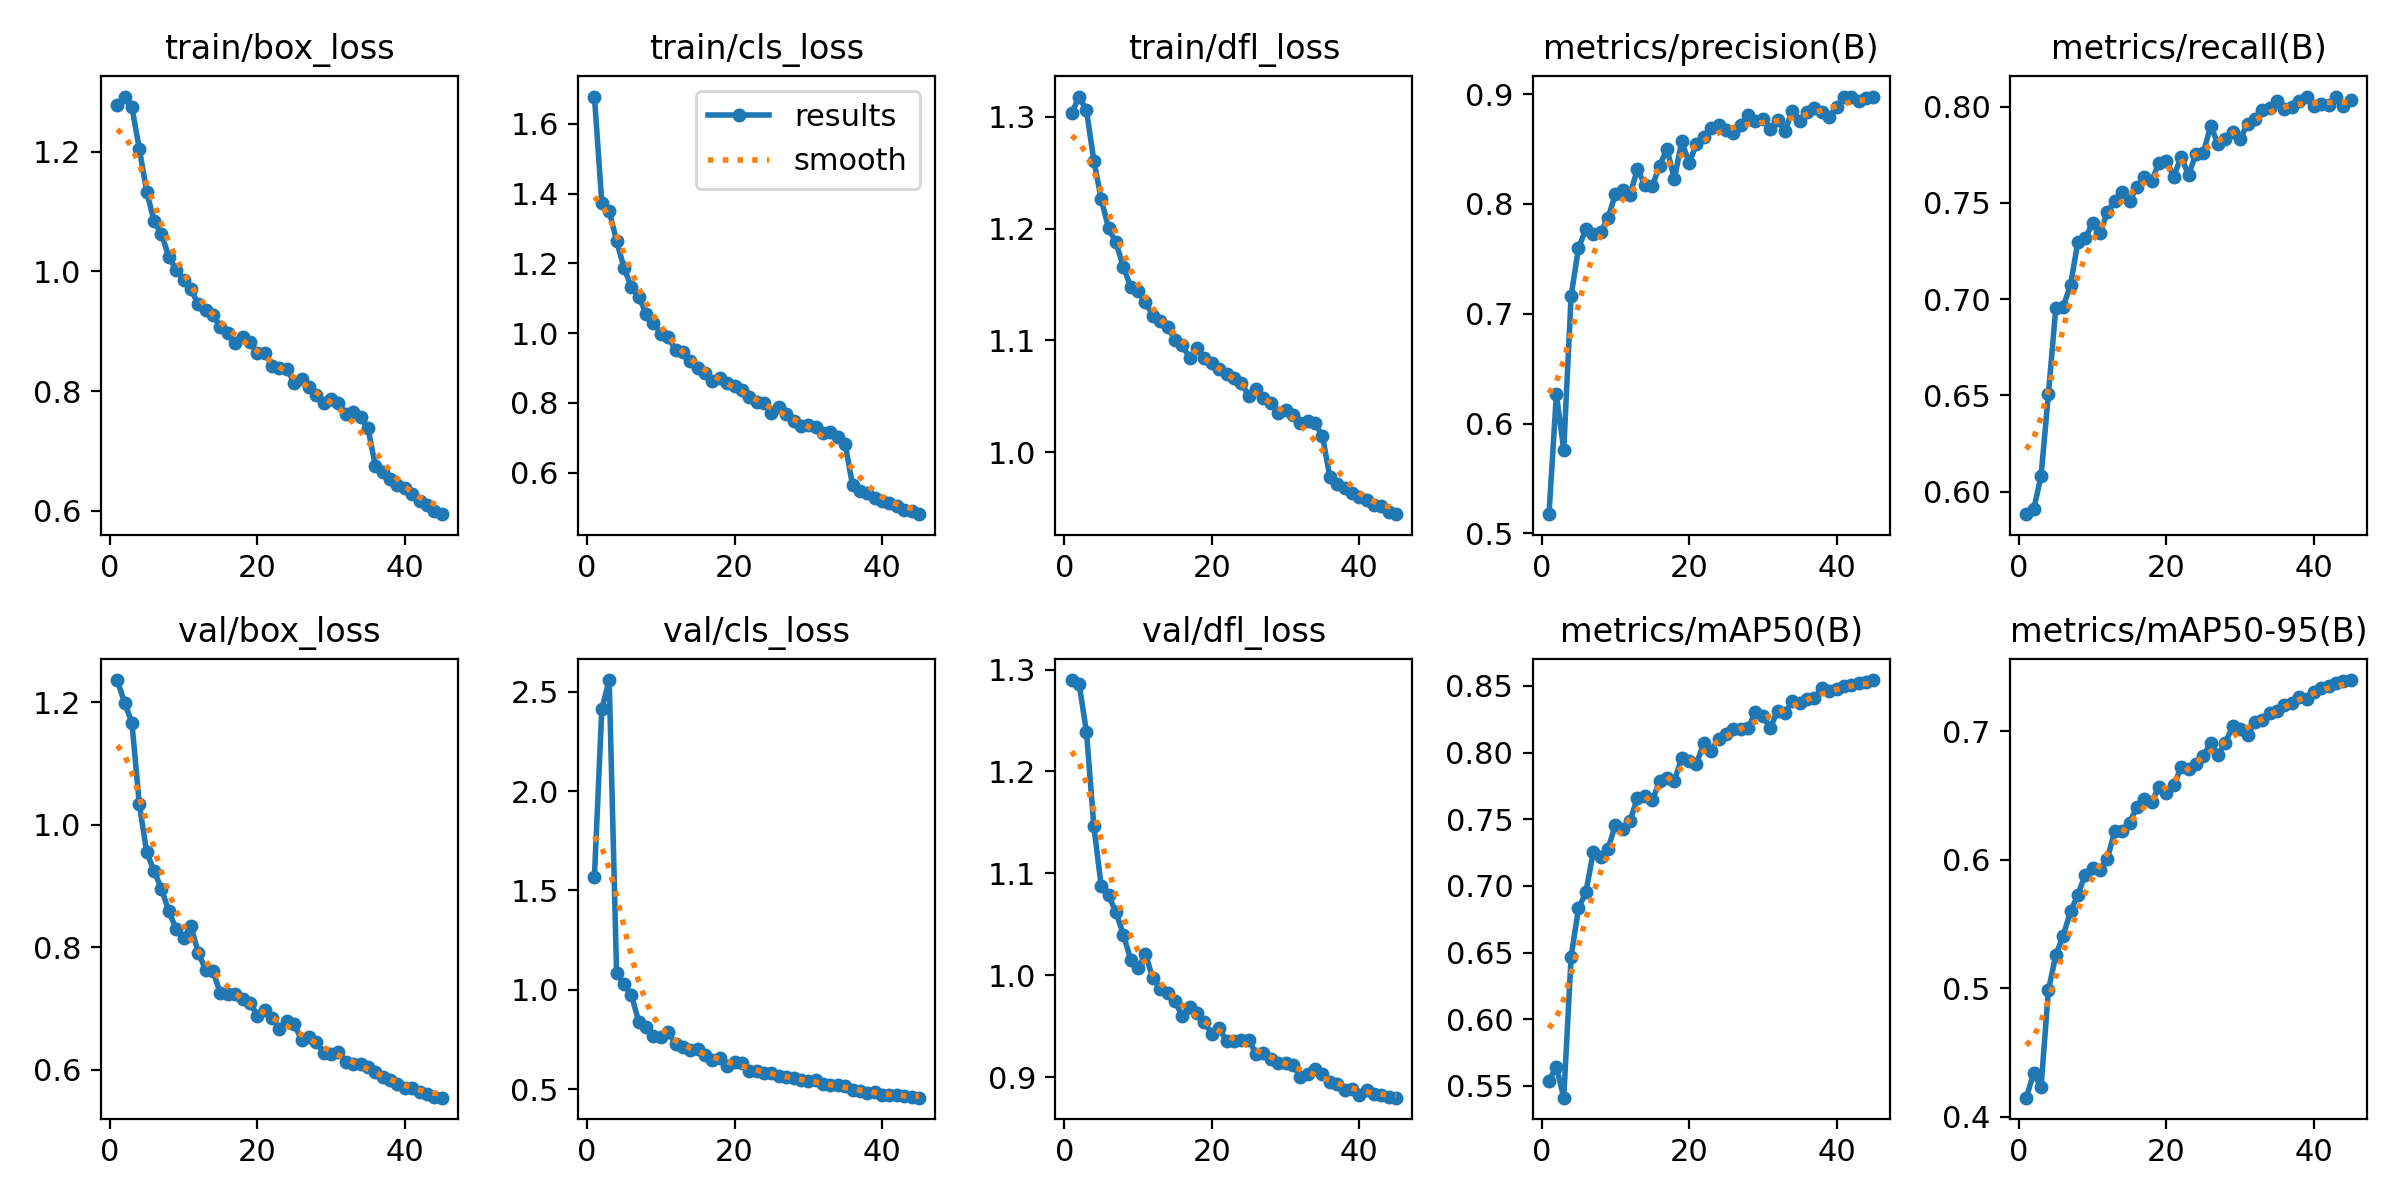

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

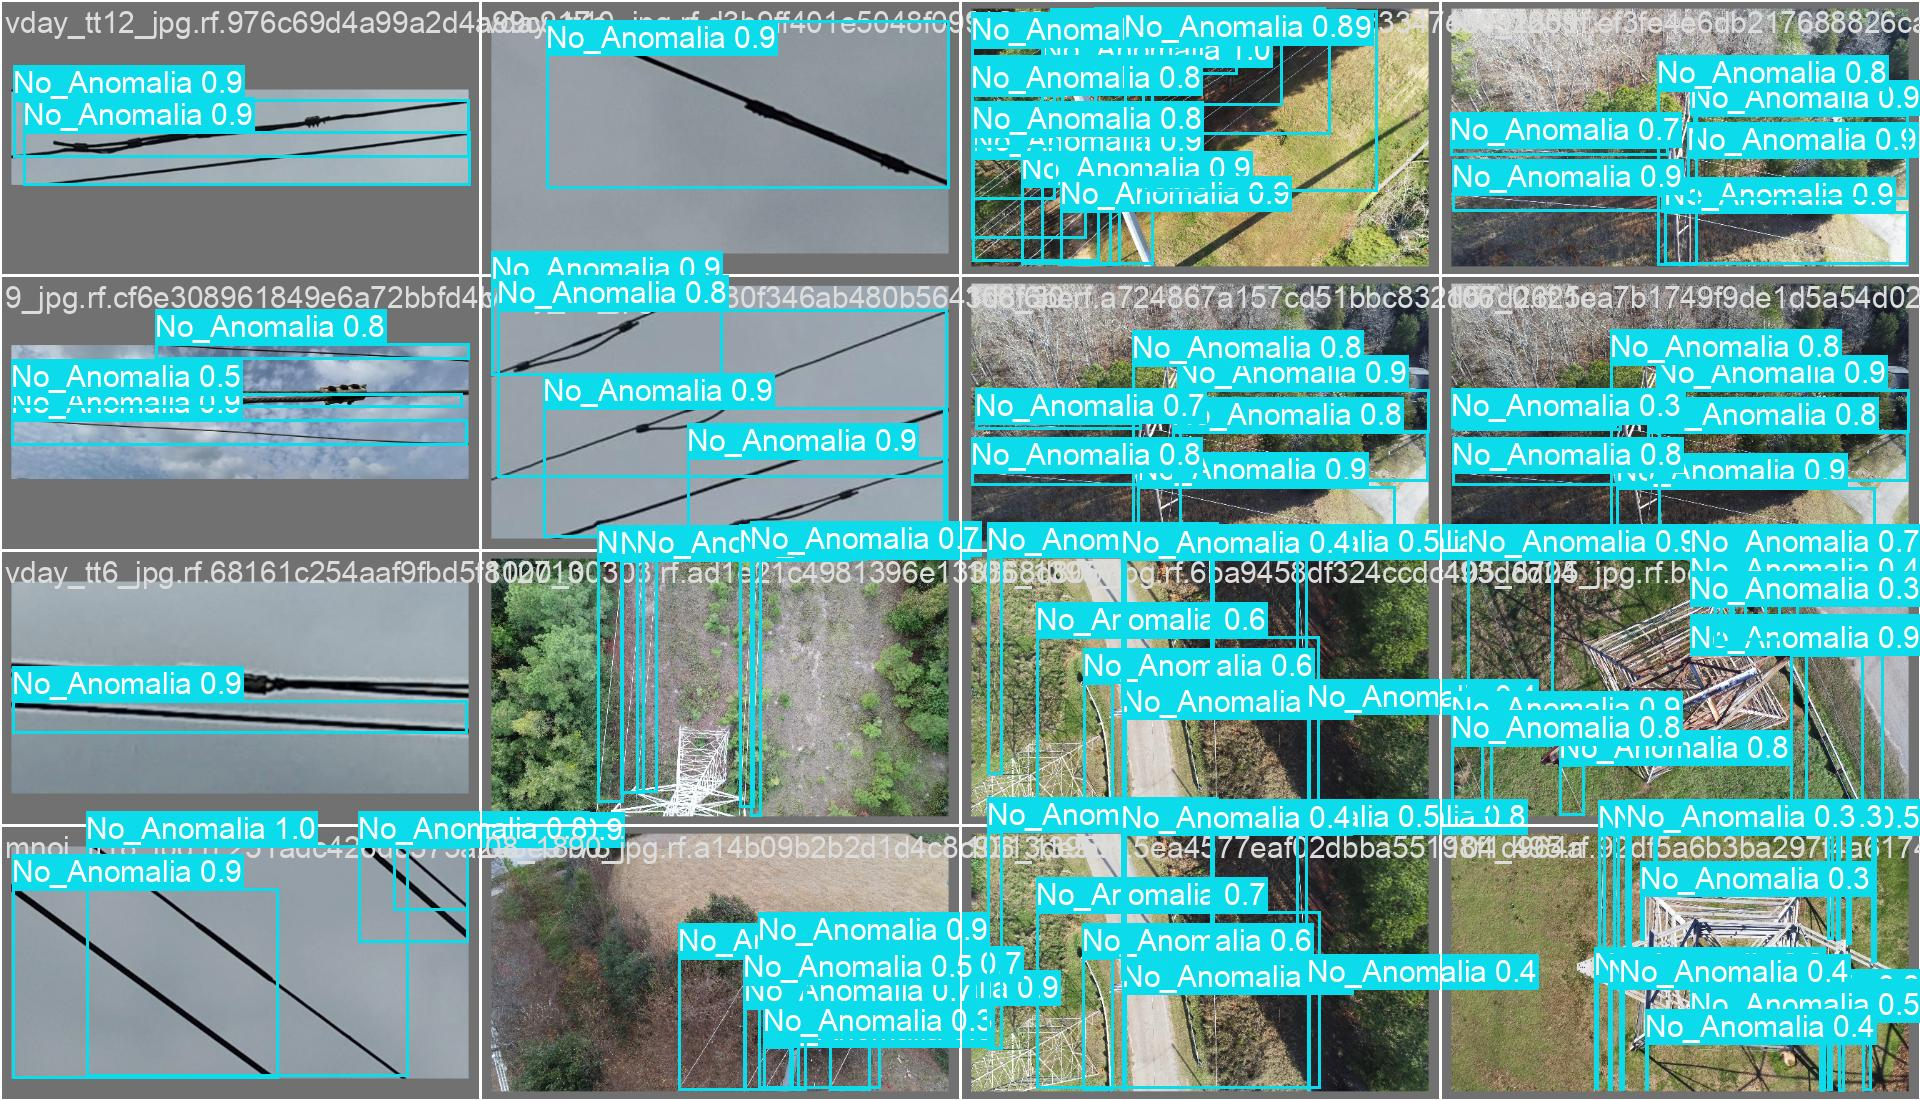

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)